<a href="https://colab.research.google.com/github/venegasfigueroahoneliaAlejandra/DERRUMBRE-DE-KM-34-VILLA-DE-LVAREZ-MINATITL-N/blob/main/Codigo%20km%2034%20Villa%20de%20%C3%81lvarez%20-%20Minatitl%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mapa interactivo guardado en: /content/drive/My Drive/mapa de puntos afectados.html


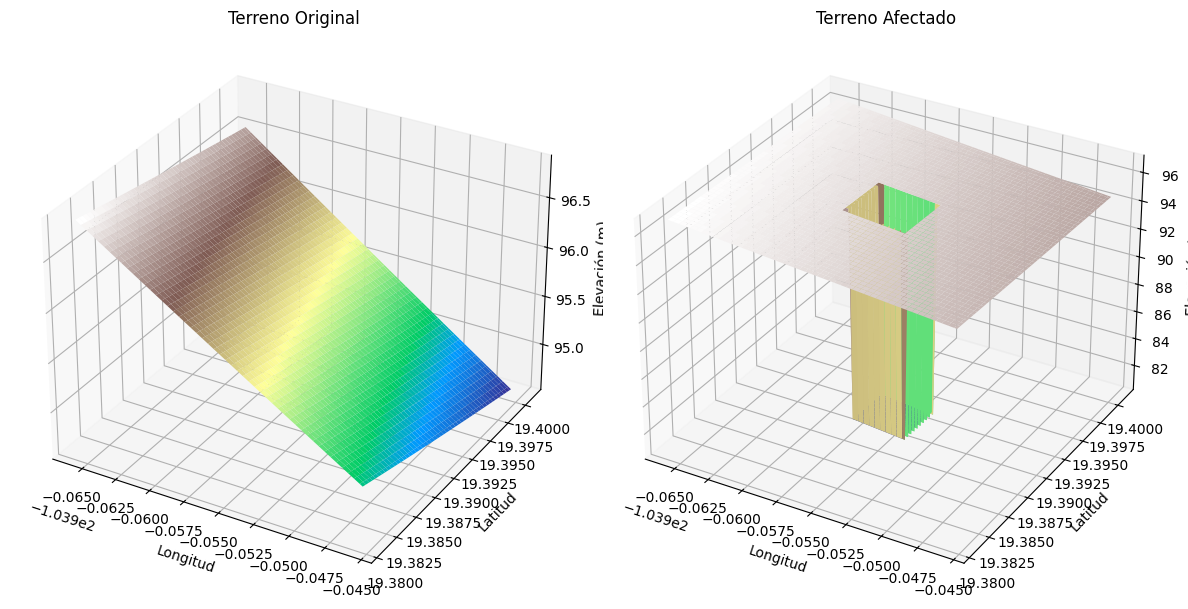

Volumen de tierra desplazada: 600000.00 metros cúbicos


In [24]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

latitude = 19.390805
longitude = -103.95575

additional_coords = [
    (19.390539719035576, -103.9557210963994),
    (19.39245927875163, -103.95547292549408),
    (19.391446830868777, -103.955609419492),
    (19.39064506131435, -103.95551635540251),
    (19.39096694007709, -103.9555349682204),
    (19.39133563678687, -103.95542949558565),
    (19.391692628043447, -103.95543569985828),
    (19.392131550646486, -103.95537365713193),
    (19.390598242532207, -103.95531161440562),
    (19.390972792412327, -103.95539226994984),
    (19.391370750715687, -103.95526198022455),
    (19.391803821881496, -103.95536745285932),
    (19.392307119356296, -103.95528679731507),
    (19.39069773242817, -103.95521855031612),
    (19.39101961108675, -103.95521855031612),
    (19.391359046073585, -103.95495797086554),
    (19.390996201751232, -103.95523095886139),
    (19.39161654800524, -103.95515650758979),
    (19.3919910955423, -103.95519373322557),
    (19.391903311040622, -103.95510066913609)
]

def simulate_terrain(lat, lon, buffer=0.01):
    x = np.linspace(lon - buffer, lon + buffer, 100)
    y = np.linspace(lat - buffer, lat + buffer, 100)
    x, y = np.meshgrid(x, y)
    z_original = 100 + 20 * np.sin(2 * np.pi * x) * np.cos(2 * np.pi * y)
    z_afectado = z_original.copy()
    z_afectado[40:60, 40:60] -= 15
    return x, y, z_original, z_afectado

x, y, z_original, z_afectado = simulate_terrain(latitude, longitude)

def create_interactive_map(lat, lon, additional_coords):
    mapa = folium.Map(location=[lat, lon], zoom_start=14)

    folium.Marker(
        [lat, lon],
        popup="Kilómetro 34 - Carretera Villa de Álvarez - Minatitlán",
        tooltip="Derrumbe",
        icon=folium.Icon(color="red", icon="exclamation-sign"),
    ).add_to(mapa)

    for coord in additional_coords:
        folium.CircleMarker(
            location=coord,
            radius=4,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.5,
            tooltip=f"Punto: {coord}",
        ).add_to(mapa)

    return mapa

def plot_terrain_3d(x, y, z_original, z_afectado):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x, y, z_original, cmap='terrain', edgecolor='none')
    ax1.set_title('Terreno Original')
    ax1.set_xlabel('Longitud')
    ax1.set_ylabel('Latitud')
    ax1.set_zlabel('Elevación (m)')
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(x, y, z_afectado, cmap='terrain', edgecolor='none')
    ax2.set_title('Terreno Afectado')
    ax2.set_xlabel('Longitud')
    ax2.set_ylabel('Latitud')
    ax2.set_zlabel('Elevación (m)')
    plt.tight_layout()
    plt.show()

def calculate_volume(z_original, z_afectado, cell_size=10):
    diff = z_original - z_afectado
    volume = np.sum(diff[diff > 0]) * cell_size**2
    return volume

output_path = '/content/drive/My Drive/mapa de puntos afectados.html'
mapa = create_interactive_map(latitude, longitude, additional_coords)
mapa.save(output_path)
print(f"Mapa interactivo guardado en: {output_path}")

plot_terrain_3d(x, y, z_original, z_afectado)

volumen = calculate_volume(z_original, z_afectado)
print(f"Volumen de tierra desplazada: {volumen:.2f} metros cúbicos")